In [1]:
name = '2015-11-27-meeting-summary'
title = 'Subplots in matplotlib'
author = 'Denis Sergeev'
tags = 'matplotlib, jupyter, binder'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags, author)

Today we discussed some of the basic `matplotlib` functions and also had a look at different ways of running Jupyter Notebooks.

## Creating subplots in `matplotlib`

### Back to basics

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

To show figure area:

In [5]:
plt.rcParams['figure.facecolor'] = '0.8' # grey background

Sample 1D array of size 100:

In [6]:
x = np.random.rand(100)

Two simplest ways of creating a bunch of subplots within one figure are shown below.

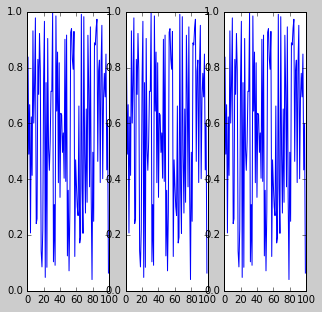

In [7]:
fig = plt.figure(figsize=(5,5))
ax_a = fig.add_subplot(131)
ax_b = fig.add_subplot(132)
ax_c = fig.add_subplot(133)

for iax in [ax_a, ax_b, ax_c]:
    iax.plot(x)

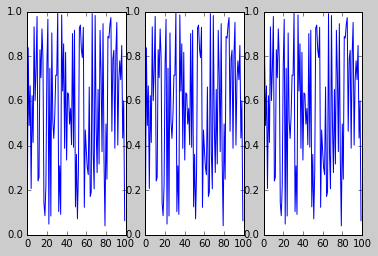

In [8]:
fig, (ax_a, ax_b, ax_c) = plt.subplots(ncols=3)
for iax in [ax_a, ax_b, ax_c]:
    iax.plot(x)

### Grid of subplots with shared axes

Using the same handy `subplots()` command, we can create an $2\times 3$ grid of subplots.

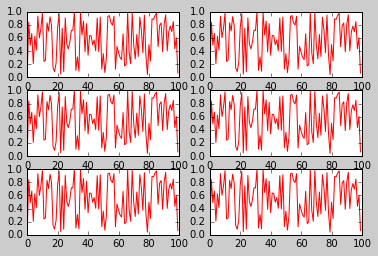

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2)
for iax in axs.flat:
    iax.plot(x, color='r')

If the subplots have same axes, it's natural to leave axis labels only in outermost subplots. We can do this setting `sharex` and `sharey` keywords in `subplots()` function to `True`.

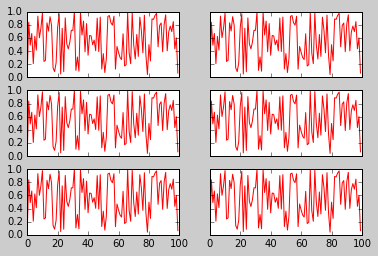

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)

for iax in axs.flat:
    iax.plot(x, color='r')

### `Gridspec`

A more sophisticated grid of subplots can be created using `matplotlib.gridspec` submodule. The quickstart guide can be found on this page: 
* [Customizing Location of Subplot Using GridSpec](http://matplotlib.org/users/gridspec.html)

## Removing empty space from `matplotlib` figures

The issue of getting rid of white space in figures was also mentioned during the meeting. `Matplotlib` has the feature called [`tight_layout()`](http://matplotlib.org/users/tight_layout_guide.html) that in some cases is enough to fit all subplots in a figure.

##### Example

In [11]:
import cartopy
import cartopy.crs as ccrs

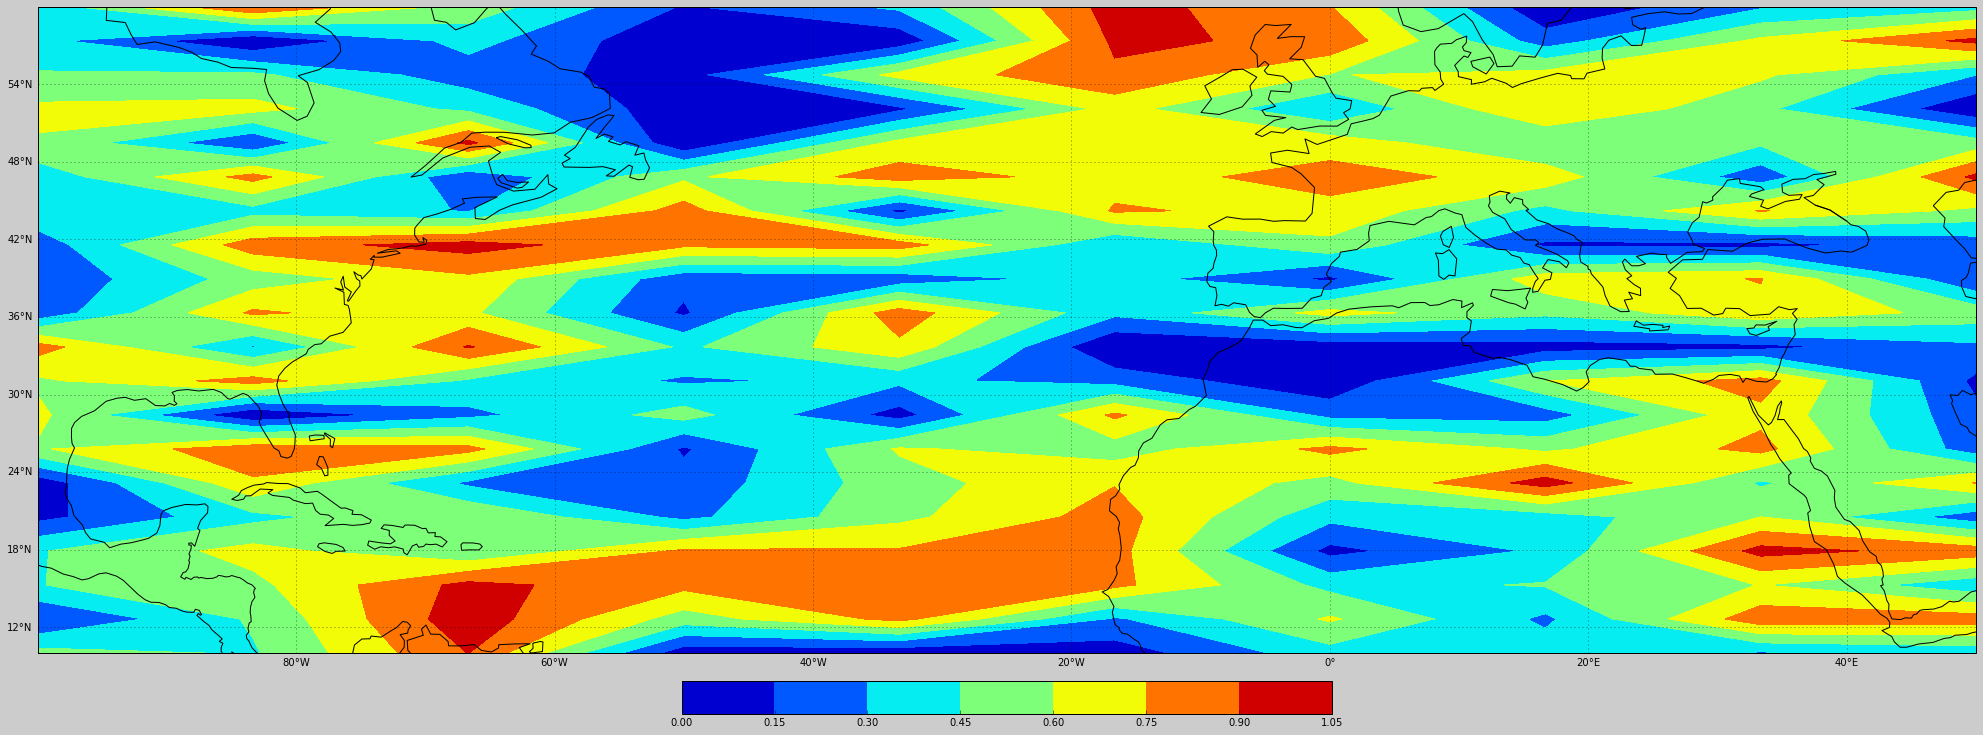

In [14]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

lon, lat = np.linspace(-100,50,10), np.linspace(10,60,20)
arr = np.random.rand(20,10)
c = ax.contourf(lon, lat, arr)
cb = plt.colorbar(c, ax=ax, orientation='horizontal', 
                  fraction=0.046, pad=0.04) # magically sets colorbar size correctly...

fig.tight_layout(pad=0)

And by the way, `ax` is not just a `matplotlib.axes._subplots.AxesSubplot` instance anymore, but has geoaxes attributes:

In [15]:
type(ax)

cartopy.mpl.geoaxes.GeoAxesSubplot

## Jupyter Notebooks

Jupyter Notebooks can be launched not only on a local PC, but also on a remote host with the help of some web-services. 

We took a glimpse at
* [mybinder.org](http://mybinder.org)
    * Example: [test_binder](https://github.com/dennissergeev/test_binder) (click 'launch binder')
* [wakari.io](https://wakari.io/)

In [16]:
HTML(html)